# Problem Statement :

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

### Loading boston dataset

In [2]:
boston_ds = load_boston()
boston_ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston_ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Creating boston dataset DataFrame
boston_df = pd.DataFrame(boston_ds.data, columns=boston_ds.feature_names)
boston_df['target'] = boston_ds.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


All the features are numerical

In [6]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

No missing values are present in dataset

In [7]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Data Visualization & EDA

Heatmap to view to correlations

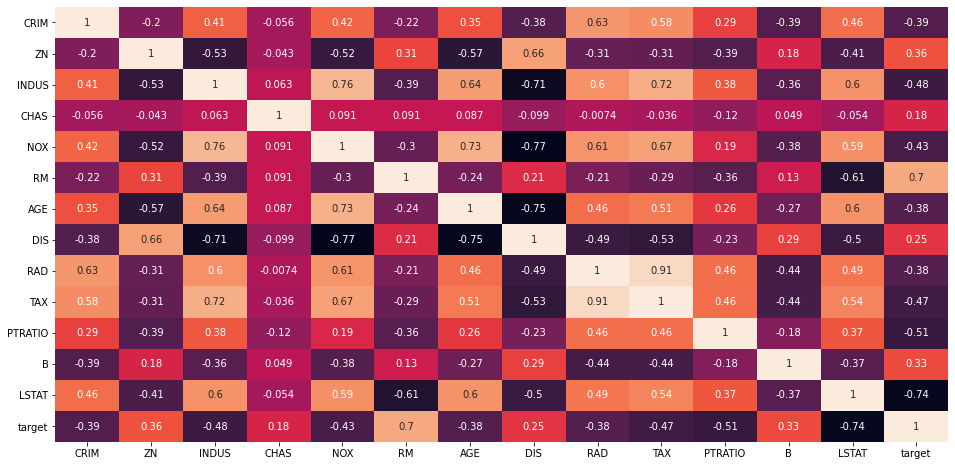

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(boston_df.corr(), annot=True, cbar=False)
plt.show()

* Age, NOX, INDUS are highly corelated with DIS
* CHAS,ZN,RAD,B,CRIM and DIS has very low correlation with target

Based on above points we can drop DIS and CHAS features

In [9]:
boston_df.drop(['DIS','CHAS','ZN','RAD','B','CRIM'], axis=1, inplace=True)
boston_df.head()

,INDUS,NOX,RM,AGE,TAX,PTRATIO,LSTAT,target
0,2.31,0.538,6.575,65.2,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,78.9,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,61.1,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,45.8,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,54.2,222.0,18.7,5.33,36.2


KDE plot to check the data varinece

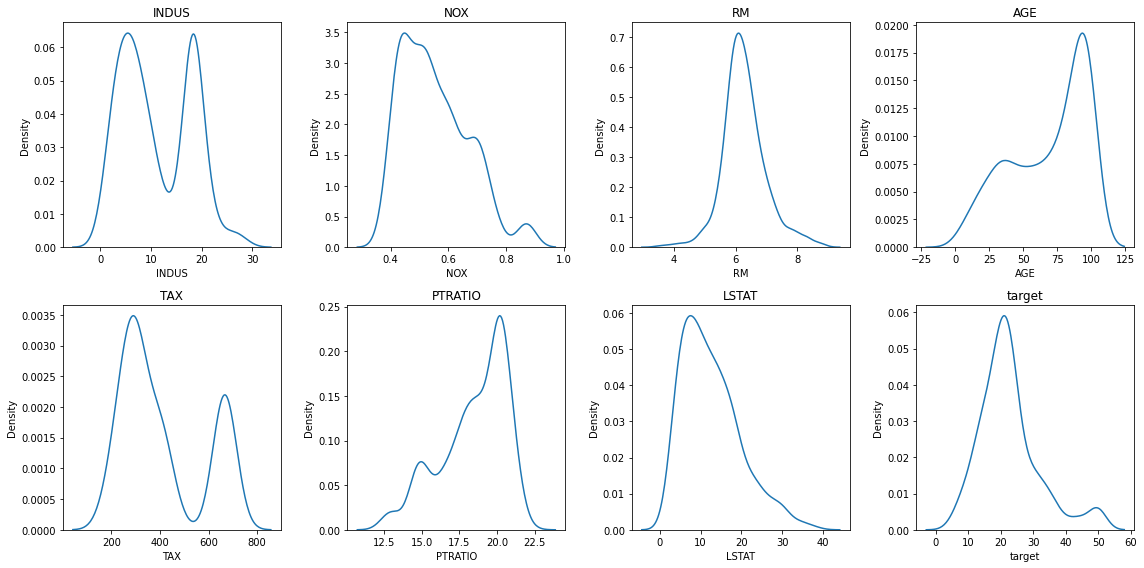

In [10]:
plt.figure(figsize=(16,8))
for i,col in enumerate(boston_df.columns):
    plt.subplot(2,4, i+1)
    sns.kdeplot(boston_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

BoxPlot to view the outliers

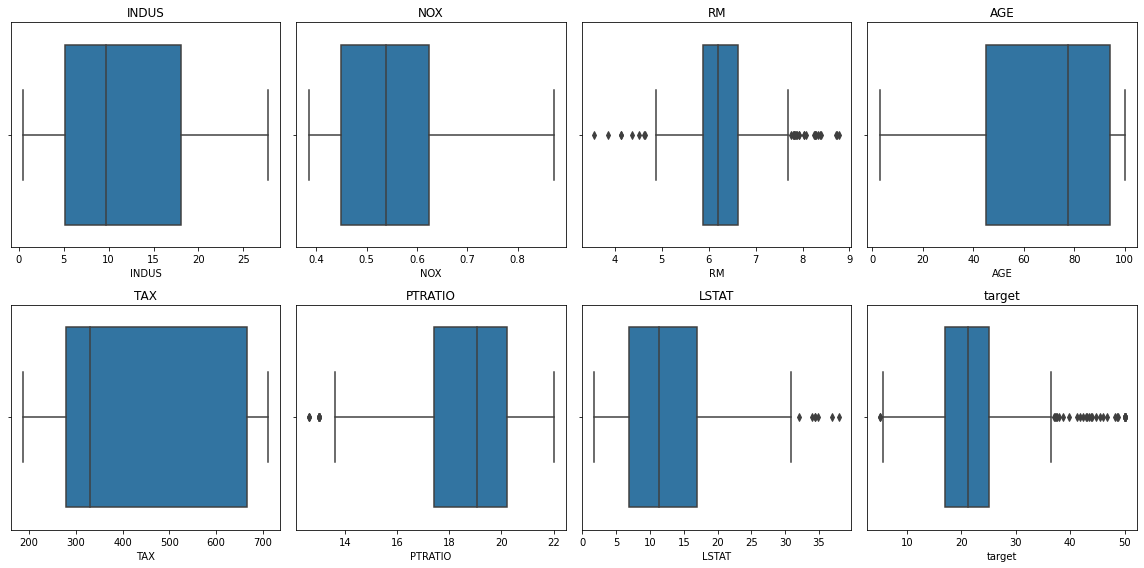

In [11]:
plt.figure(figsize=(16,8))
for i,col in enumerate(boston_df.columns):
    plt.subplot(2,4, i+1)
    sns.boxplot(boston_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

To remove outliers we can perform __winsorizing__ method

In [12]:
# other skewed columns
skewed_cols = ['RM','PTRATIO','LSTAT']

In [13]:
# Performing winsorizing (1.5*IQR) method to remove the outliers
import scipy

def winsorize_outliers(col):
    boston_df['win_'+col] = scipy.stats.mstats.winsorize(boston_df[col], limits=0.05)
    
for col in skewed_cols:
    winsorize_outliers(col)

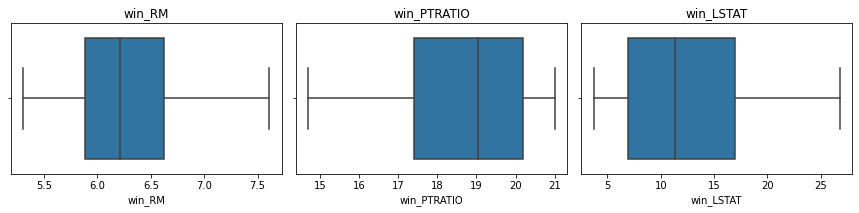

In [14]:
plt.figure(figsize=(16,8))
for i,col in enumerate(skewed_cols):
    plt.subplot(3,4, i+1)
    sns.boxplot(boston_df['win_'+col])
    plt.title('win_'+col)
plt.tight_layout()
plt.show()

In [15]:
# Droping the old skewed features 
boston_df.drop(skewed_cols, axis=1, inplace=True)
boston_df.head()

,INDUS,NOX,AGE,TAX,target,win_RM,win_PTRATIO,win_LSTAT
0,2.31,0.538,65.2,296.0,24.0,6.575,15.3,4.98
1,7.07,0.469,78.9,242.0,21.6,6.421,17.8,9.14
2,7.07,0.469,61.1,242.0,34.7,7.185,17.8,4.03
3,2.18,0.458,45.8,222.0,33.4,6.998,18.7,3.70
4,2.18,0.458,54.2,222.0,36.2,7.147,18.7,5.33


In [16]:
X = boston_df.drop(['target'], axis=1)
Y = boston_df.target

X.shape, Y.shape

((506, 7), (506,))

In [17]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 7), (102, 7), (404,), (102,))

### Creating the Linear Regression pipeline

In [18]:
lr_model = LinearRegression(normalize=True)

lr_pipe = Pipeline(steps=[('scaler', StandardScaler()),('linear', lr_model)])

lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)
y_train_pred = lr_pipe.predict(X_train)

In [19]:
lr_test_score = lr_pipe.score(X_test, y_test)
lr_train_score = lr_pipe.score(X_train, y_train)

lr_train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
lr_test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))


print('Train Score', lr_train_score)
print('Test Score', lr_test_score)
print('Train RMSE', lr_train_rmse)
print('Test RMSE', lr_test_rmse)

Train Score 0.6952091350672647
Test Score 0.7233833020916538
Train RMSE 4.998066541153815
Test RMSE 5.102011507610987


### Creating Ridge Regression Model

In [20]:
hyper_params = {
    'ridge__alpha': [0.05, 0.1, 1.0, 10.0],
    'ridge__fit_intercept': [True, False],
    'ridge__normalize': [False, True],
}

In [21]:
ridge_model = Ridge()

ridge_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('ridge', ridge_model)])

gscv = GridSearchCV(ridge_pipe, hyper_params, cv=20)
gscv.fit(X_train, y_train)
gscv.best_params_,gscv.best_score_

({'ridge__alpha': 0.1, 'ridge__fit_intercept': True, 'ridge__normalize': True},
 0.6796309738793035)

In [22]:
rcv_model = Ridge(alpha=0.1, fit_intercept=True, normalize=True)

rcv_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('rcv', rcv_model)])

rcv_pipe.fit(X_train, y_train)

y_pred = rcv_pipe.predict(X_test)
y_train_pred = rcv_pipe.predict(X_train)

In [23]:
rcv_train_score = rcv_pipe.score(X_train, y_train)
rcv_test_score = rcv_pipe.score(X_test, y_test)

rcv_train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
rcv_test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))


print('Train Score', rcv_train_score)
print('Test Score', rcv_test_score)
print('Train RMSE', rcv_train_rmse)
print('Test RMSE', rcv_test_rmse)

Train Score 0.6912625413656702
Test Score 0.7138523365572185
Train RMSE 5.030321271773338
Test RMSE 5.189163318991458


Linear regression performance is better than ridge regression

### Creating Lasso Regression Model

In [24]:
hyper_params = {
    'lasso__alpha': [0.05, 0.1, 1.0, 10.0],
    'lasso__fit_intercept': [True, False],
    'lasso__normalize': [False, True],
    'lasso__precompute': [False, True],
    'lasso__max_iter': [500, 800],
    'lasso__selection': ['cyclic', 'random'],
}

In [25]:
lasso_model = Lasso()

lasso_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('lasso', lasso_model)])

gscv = GridSearchCV(lasso_pipe, hyper_params, cv=20)
gscv.fit(X_train, y_train)
gscv.best_params_,gscv.best_score_

({'lasso__alpha': 0.1,
  'lasso__fit_intercept': True,
  'lasso__max_iter': 800,
  'lasso__normalize': False,
  'lasso__precompute': False,
  'lasso__selection': 'random'},
 0.6717379406784766)

In [26]:
lasso_model = Lasso(alpha=0.1, fit_intercept=True, normalize=False, max_iter=800, precompute=True, selection='random')

lasso_pipe = Pipeline(steps=[('scaler', StandardScaler()), ('lasso', lasso_model)])

lasso_pipe.fit(X_train, y_train)

y_pred = lasso_pipe.predict(X_test)
y_train_pred = lasso_pipe.predict(X_train)

In [27]:
lasso_train_score = lasso_pipe.score(X_train, y_train)
lasso_test_score = lasso_pipe.score(X_test, y_test)

lasso_train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
lasso_test_rmse = math.sqrt(mean_squared_error(y_test, y_pred))


print('Train Score', lasso_train_score)
print('Test Score', lasso_test_score)
print('Train RMSE', lasso_train_rmse)
print('Test RMSE', lasso_test_rmse)

Train Score 0.6928101043093198
Test Score 0.7200601569532894
Train RMSE 5.0176980567119145
Test RMSE 5.13256661673018


Linear Regression is still slightly better than lasso

### Model Evaluation

__Scores Evaluation__

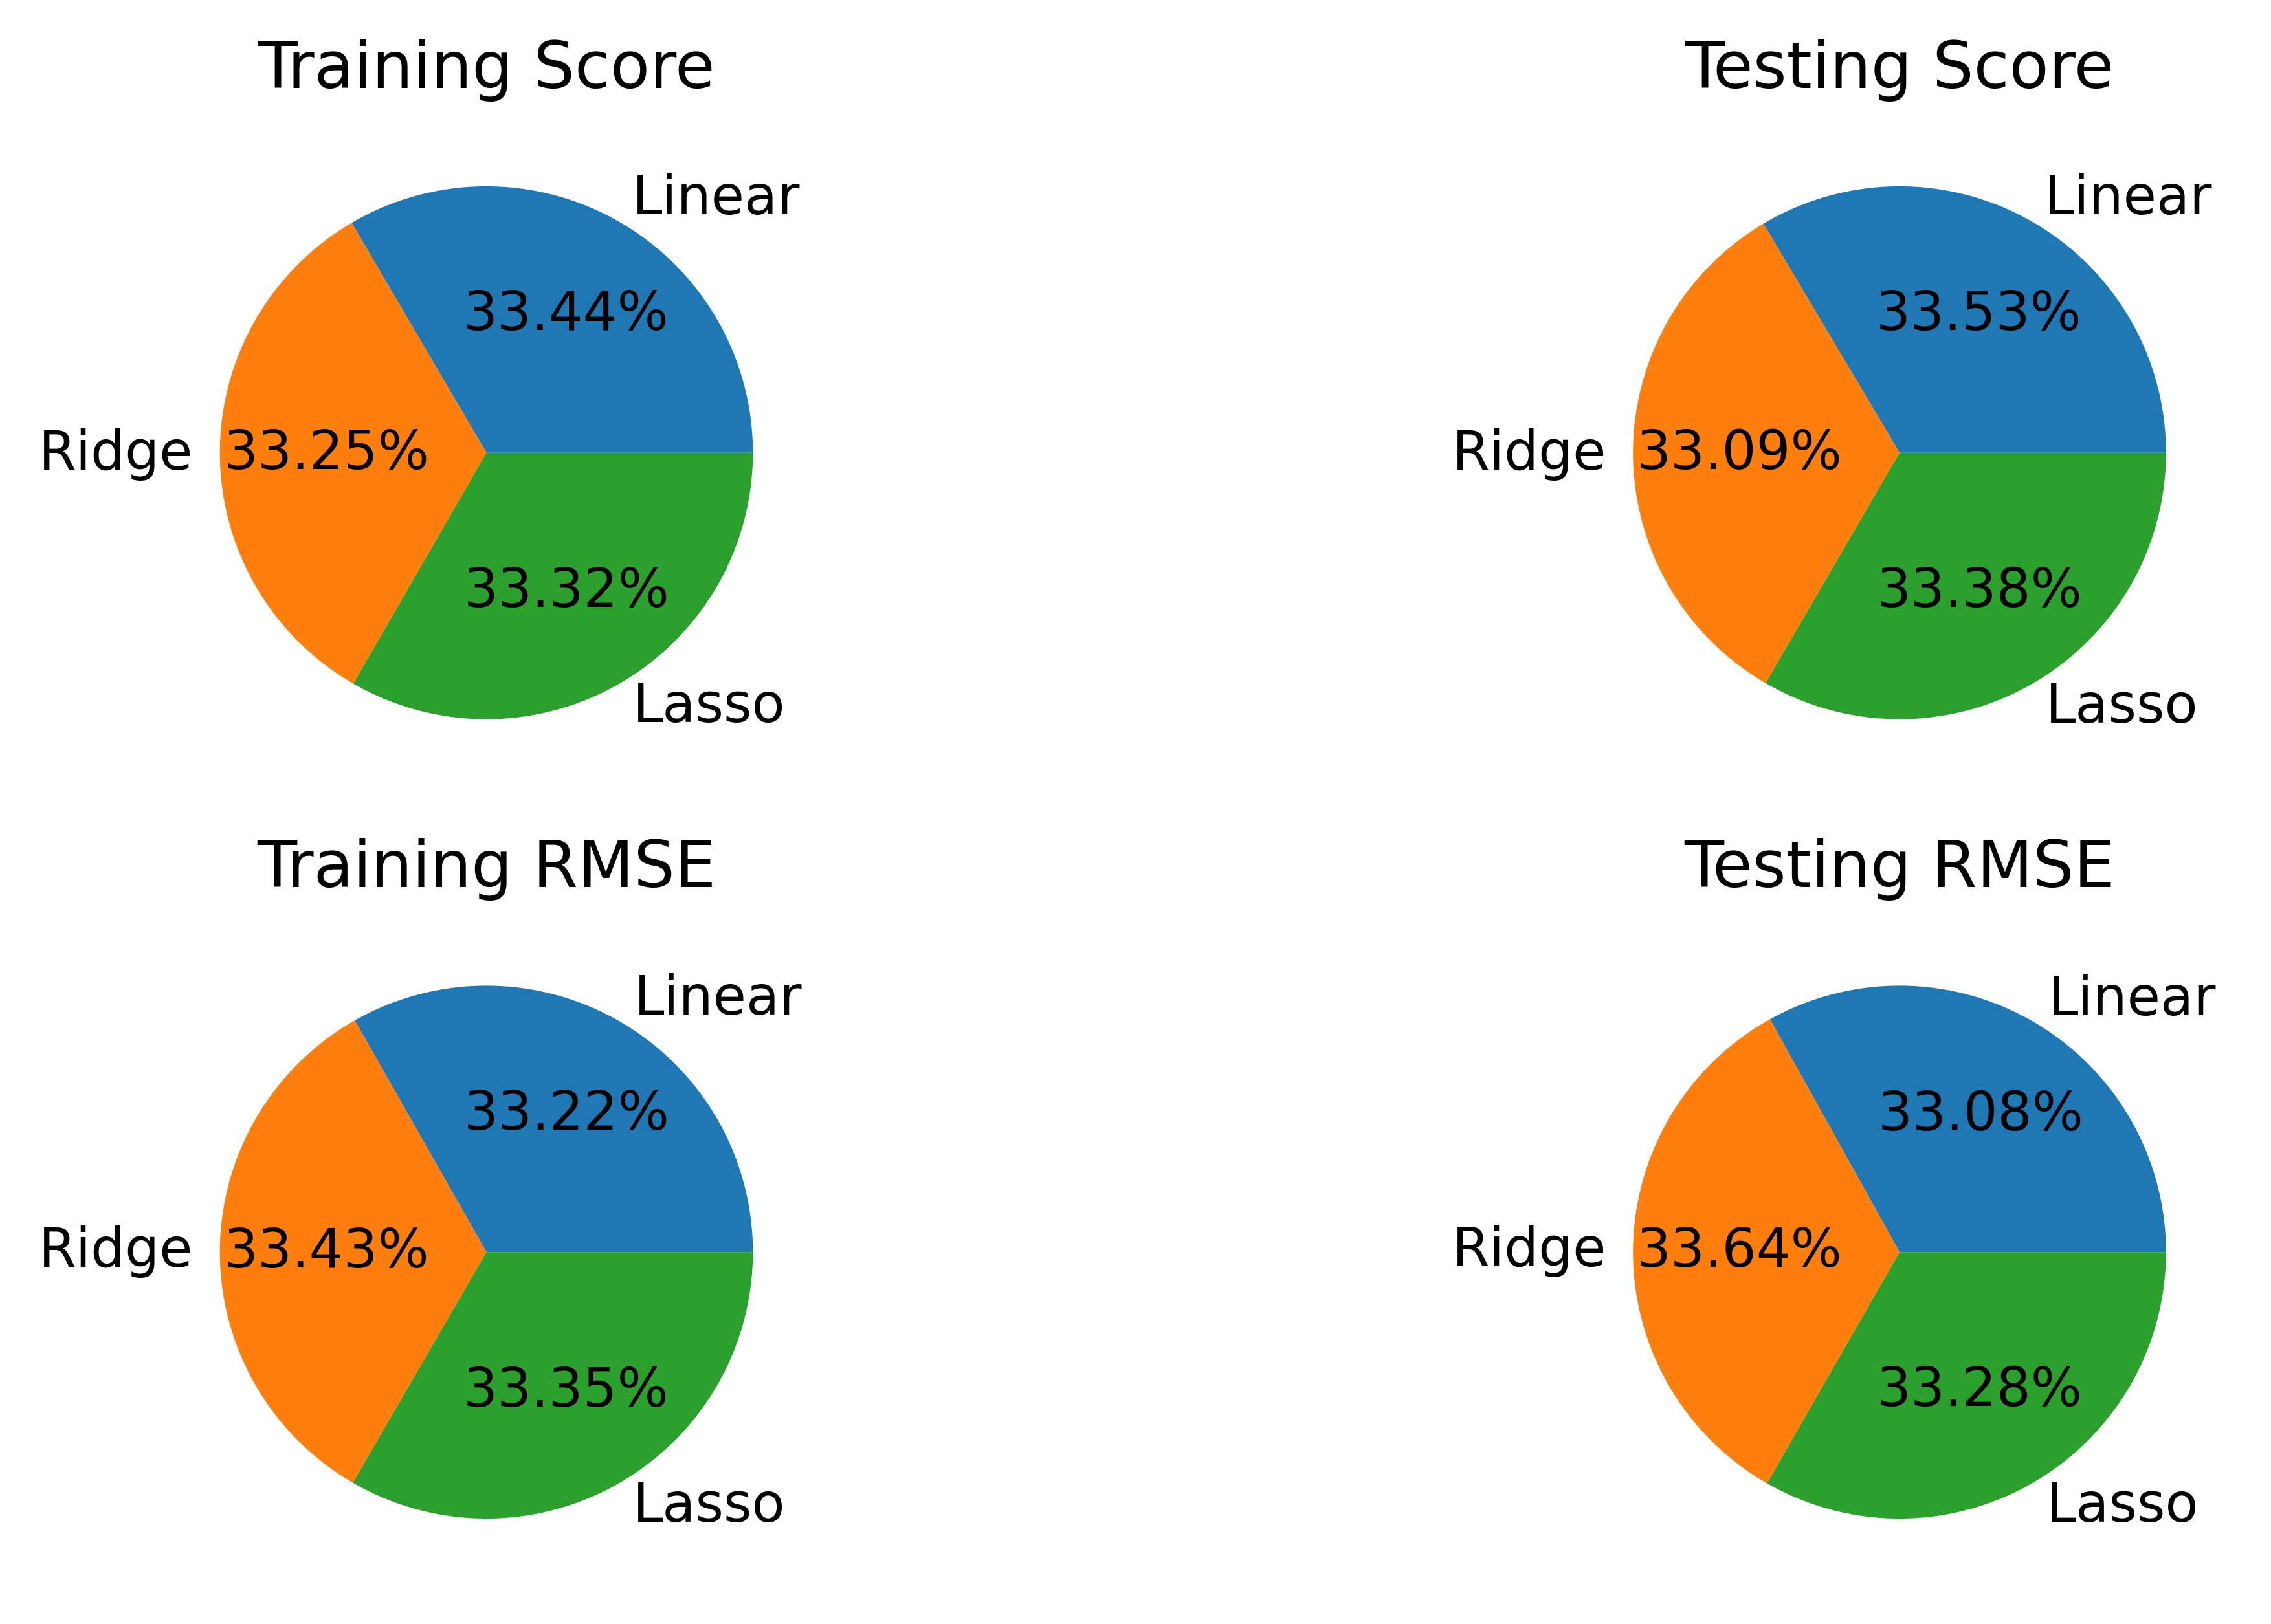

In [28]:
fig = plt.figure(figsize=(18,5), dpi=600)
#this line will produce a figure which has 2 row 
#and 4 columns 
#(0, 0) specifies the left upper coordinate of your plot
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie([lr_train_score, rcv_train_score, lasso_train_score],
        labels = ['Linear', 'Ridge', 'Lasso'], autopct='%1.2f%%')
plt.title('Training Score')

#next one
ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie([lr_test_score, rcv_test_score, lasso_test_score], labels = ['Linear', 'Ridge', 'Lasso'], autopct='%1.2f%%')
plt.title('Testing Score')

# row 2 col 1
ax1 = plt.subplot2grid((2,4),(1,0))
plt.pie([lr_train_rmse, rcv_train_rmse, lasso_train_rmse],
        labels = ['Linear', 'Ridge', 'Lasso'], autopct='%1.2f%%')
plt.title('Training RMSE')

#next 2 col 2
ax1 = plt.subplot2grid((2, 4), (1, 1))
plt.pie([lr_test_rmse, rcv_test_rmse, lasso_test_rmse], labels = ['Linear', 'Ridge', 'Lasso'], autopct='%1.2f%%')
plt.title('Testing RMSE')

plt.show()

Based on above evaluations we will accept the linear regression with :

* Train Score 0.6952091350672647
* Test Score 0.7233833020916538
* Train RMSE 4.998066541153815
* Test RMSE 5.102011507610987

### Saving the final model for deplovment

In [29]:
X_train.head()

,INDUS,NOX,AGE,TAX,win_RM,win_PTRATIO,win_LSTAT
423,18.10,0.614,85.1,666.0,6.103,20.2,23.29
82,4.86,0.426,32.2,281.0,6.302,19.0,6.72
55,1.22,0.403,21.9,226.0,7.249,17.9,4.81
411,18.10,0.597,100.0,666.0,6.657,20.2,21.22
209,10.59,0.489,100.0,277.0,5.344,18.6,23.09


In [34]:
y_train.head()

423    13.4
82     24.8
55     35.4
411    17.2
209    20.0
Name: target, dtype: float64

In [36]:
import pickle

pickle.dump(lr_pipe, open('boston_lr_ml_model.sav','wb'))

In [39]:
import pickle
model = pickle.load(open('boston_lr_ml_model.sav','rb'))

data = [[2.31,0.538,6.575,65.2,296,15.3,4.98]]

model.predict(data)


array([1533.40023873])